In [8]:
import mga
import numpy as np
import matplotlib.pyplot as plt
from problems import ChankongHaimes
from problems import BinhKorn

In [9]:
problem = BinhKorn()
random_restarts = 500
MGA = mga.MicroGeneticAlgorithm(
    problem,
    num_variables=2,
    population_size=50,
    agents_to_keep=2,
    agents_to_shuffle=0,
    random_restarts=random_restarts,
    max_iterations=50,
    num_bits=64,
    random_seed=42,
)
MGA.run_iterations()

Random restart: 0 starting, best fitness is 22.062775033104217             and best agent is [1.47520354 1.45800148]
[0.37454012 0.62545988]
Random restart: 1 starting, best fitness is 13.66246482325888             and best agent is [0.51384121 0.51659244]
[0.69716625 0.30283375]
Random restart: 2 starting, best fitness is 21.583495786778922             and best agent is [1.31065525 1.29744219]
[0.41826408 0.58173592]
Random restart: 3 starting, best fitness is 21.680150482663464             and best agent is [2.03835545 2.0242825 ]
[0.26351145 0.73648855]
Random restart: 4 starting, best fitness is 12.748576359522708             and best agent is [0.43933918 0.4181918 ]
[0.72032021 0.27967979]
Random restart: 5 starting, best fitness is 11.188865964705196             and best agent is [0.37436019 0.41190763]
[0.75855075 0.24144925]
Random restart: 6 starting, best fitness is 22.224497014876192             and best agent is [1.69941581 1.68084262]
[0.33304454 0.66695546]
Random restart

In [10]:
f1 = np.zeros((random_restarts))
f2 = np.zeros((random_restarts))
for i in range(len(MGA.best_agents)):
    f1[i] = problem.f_1(MGA.best_agents[i])
    f2[i] = problem.f_2(MGA.best_agents[i])

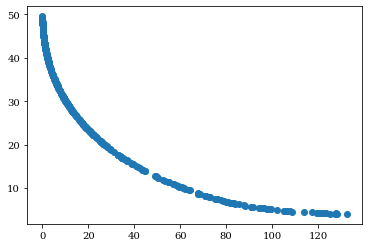

In [11]:
plt.scatter(f1,f2)

In [12]:
import benchmark_chankong_haimes as bm
from pymoo.optimize import minimize
from pymoo.core.problem import ElementwiseProblem
from pymoo.visualization.scatter import Scatter

# Predefined Problems, Algorithms and Terminations
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.util.termination.default import MultiObjectiveDefaultTermination

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     100 |  0.00000E+00 |  0.308850293 |      32 |            - |            -
    2 |     200 |  0.00000E+00 |  0.00000E+00 |      53 |  0.007836112 |        ideal
    3 |     300 |  0.00000E+00 |  0.00000E+00 |      82 |  0.011608642 |        ideal
    4 |     400 |  0.00000E+00 |  0.00000E+00 |     100 |  0.003269381 |            f
    5 |     500 |  0.00000E+00 |  0.00000E+00 |     100 |  0.002486995 |            f
    6 |     600 |  0.00000E+00 |  0.00000E+00 |     100 |  0.002569193 |            f
    7 |     700 |  0.00000E+00 |  0.00000E+00 |     100 |  0.002282180 |            f
    8 |     800 |  0.00000E+00 |  0.00000E+00 |     100 |  0.005544084 |        nadir
    9 |     900 |  0.00000E+00 |  0.00000E+00 |     100 |  0.003282223 |        nadir
   10 |    1000 |  0.00000E+00 |  0.00000E+00 |     100 |  0.004517344 |        nadir
   11 |    1100 |  0.00000E+00 |  0.00000E+00 |     10

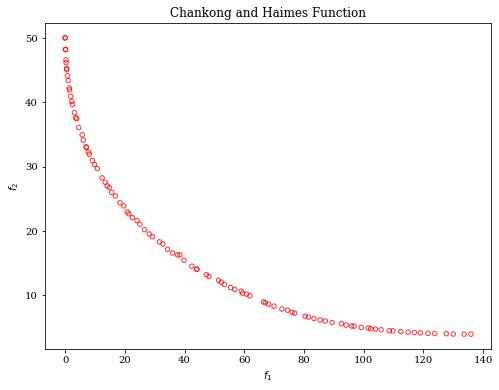

In [13]:
problem = bm.BihnKorn()
algorithm = NSGA2()
termination = MultiObjectiveDefaultTermination()
result = minimize(
    problem,
    algorithm,
    termination,
    pf=True,
    seed=1,
    save_history=True,
    verbose=True,
)
plot = Scatter(title="Chankong and Haimes Function")
plot.add(result.F, facecolor="none", edgecolor="red", alpha=0.8, s=20)
plot.show()

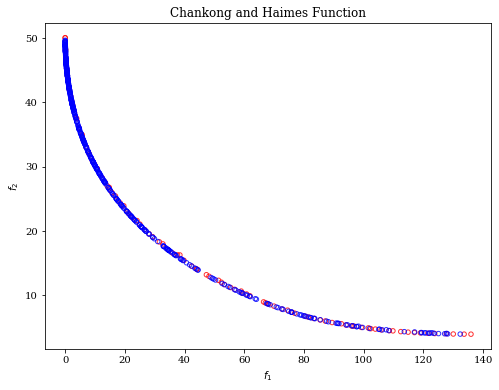

In [14]:
f = np.vstack((f1, f2)).T
#f = f[:100][:]
plot = Scatter(title="Chankong and Haimes Function")
plot.add(result.F, facecolor="none", edgecolor="red", alpha=0.8, s=20)
plot.add(f, facecolor="none", edgecolor="blue", alpha=0.8, s=20)
plot.show()